<a href="https://colab.research.google.com/github/gauravraidata/IITJ-projects/blob/main/Assignment1(DP%2CLR%2CSVM%2CRF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

You have been provided with a CSV file "Cars93.csv." The given dataset is related to cars and
contains 26 columns. In the given dataset, “Price” is the target variable (i.e., the output). The
marks distribution according to the tasks are as follows:
1. Assign a type to each of the following features (a) Model, (b) Type, (c) Max. Price and
(d) Airbags from the following: ordinal/nominal/ratio/interval scale.
2. Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).
3. Write a function to reduce noise (any error in the feature) in individual attributes.
4. Write a function to encode all the categorical features in the dataset according to the
type of variable jointly.
5. Write a function to normalize / scale the features either individually or jointly.
6. Write a function to create a random split of the data into train, validation and test sets in
the ratio of [70:20:10].

###Data Preprocessing

In [4]:
# Loading the dataset stored in drive folder and previewing

Cars = pd.read_csv('/content/drive/MyDrive/Assignment files/Ass1 ML/Cars93.csv')
Cars.head(10)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
5,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,...,16.4,6,189,105,69,41,28.0,16.0,2880,USA
6,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,...,18.0,6,200,111,74,42,30.5,17.0,3470,USA
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,...,23.0,6,216,116,78,45,30.5,21.0,4105,USA
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,...,18.8,5,198,108,73,41,26.5,14.0,3495,USA
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,...,18.0,6,206,114,73,43,35.0,18.0,3620,USA


####**1.** Assign a type to each of the following features (a) Model, (b) Type, (c) Max. Price and(d) Airbags from the following: ordinal/nominal/ratio/interval scale.



*   *Model - Nominal  (only name, no order, no interval, no ratio possible)*
*   *Type - Nominal (name)*

*   *Max.Price - Ratio (price can be zero and we can find the ration between min and max price)*
*   *Airbags - Ordinal (name and 2 stages)*





In [5]:
Cars[['Model', 'Type', 'Max.Price', 'AirBags']]

,Model,Type,Max.Price,AirBags
0,Integra,Small,18.8,NaN
1,Legend,Midsize,38.7,Driver & Passenger
2,90,Compact,32.3,Driver only
3,100,Midsize,44.6,Driver & Passenger
4,535i,Midsize,36.2,Driver only
...,...,...,...,...
88,Eurovan,Van,22.7,NaN
89,Passat,Compact,22.4,NaN
90,Corrado,Sporty,23.7,NaN
91,240,Compact,23.5,Driver only


In [6]:
l = ['Model', 'Type', 'Max.Price', 'AirBags']
for i in l:
  number_of_unique_values = Cars[i].value_counts().count()
  print(f'Number of unique values in {i} is {number_of_unique_values}')

Number of unique values in Model is 93
Number of unique values in Type is 6
Number of unique values in Max.Price is 79
Number of unique values in AirBags is 2


####2. Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).

In [7]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [8]:
# total num values in df
Cars.isnull().sum().sum()

47

In [9]:
# airbag have highest null values count, checking all unique values
Cars['AirBags'].unique()

array([nan, 'Driver & Passenger', 'Driver only'], dtype=object)

In [10]:
#following function will fill the missing data with mode of the series for object and mean for int
def handle_missing_values(value):
    if value.isnull().any():
        if value.dtype == 'object':
            mode = value.mode()
            return value.fillna(mode[0])
        else:
            mean = value.mean()
            return value.fillna(mean)
    return value


In [11]:
#there are missing values in AirBags,Rear.seat.room , Luggage.room columns using created function to handle them
cars1 = Cars.copy()
missing_value_col = ['AirBags', 'Rear.seat.room', 'Luggage.room']
for i in missing_value_col:
  cars1[i] = handle_missing_values(cars1[i])

In [12]:
#cheching if there is any null value left
cars1.isnull().sum().sum()

0

In [13]:
missing_value_col = ['AirBags', 'Rear.seat.room', 'Luggage.room']
for i in missing_value_col:
  Cars[i] = handle_missing_values(Cars[i])

Cars.isnull().sum().sum()

0

####3. Write a function to reduce noise (any error in the feature) in individual attributes.

In [14]:
#checking number of unique values of numerical dataset

unique_valuesn_list = []

for i in Cars.columns:
    if Cars[i].dtype != 'object':
        unique_values = Cars[i].unique()
        unique_valuesn_list.append({'Column': i, 'Unique Values': unique_values})
    else:
        continue

unique_valuesn_df = pd.DataFrame(unique_valuesn_list)

unique_valuesn_df.head(100)

#creating hist plot of unique_valuesn_df with each bin of 10% of total value range




,Column,Unique Values
0,Min.Price,"[12.9, 29.2, 25.9, 30.8, 23.7, 14.2, 19.9, 22...."
1,Price,"[15.9, 33.9, 29.1, 37.7, 30.0, 15.7, 20.8, 23...."
2,Max.Price,"[18.8, 38.7, 32.3, 44.6, 36.2, 17.3, 21.7, 24...."
3,MPG.city,"[25, 18, 20, 19, 22, 16, 21, 15, 17, 23, 29, 3..."
4,MPG.highway,"[31, 25, 26, 30, 28, 27, 36, 34, 29, 23, 20, 3..."
5,EngineSize,"[1.8, 3.2, 2.8, 3.5, 2.2, 3.8, 5.7, 4.9, 4.6, ..."
6,Horsepower,"[140, 200, 172, 208, 110, 170, 180, 295, 160, ..."
7,RPM,"[6300, 5500, 5700, 5200, 4800, 4000, 4100, 600..."
8,Rev.per.mile,"[2890, 2335, 2280, 2535, 2545, 2565, 1570, 132..."
9,Fuel.tank.capacity,"[13.2, 18.0, 16.9, 21.1, 16.4, 23.0, 18.8, 20...."


Passengers should not be part of numerical info as it is a categorical information with respect to cars, hence changing its datatype to object

In [15]:
Cars['Passengers'] = Cars['Passengers'].astype('object')

In [16]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [17]:
#creating list of categorical and numerical columns for future references
categorical_columns = Cars.select_dtypes(include=['object']).columns
numerical_columns = Cars.select_dtypes(include=['int64', 'float64']).columns

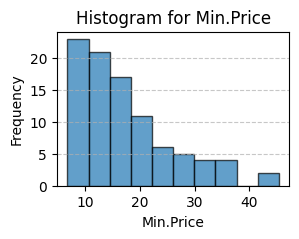

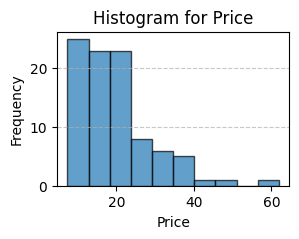

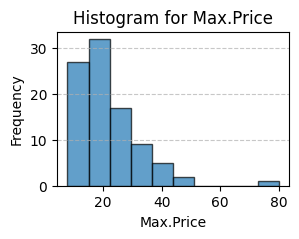

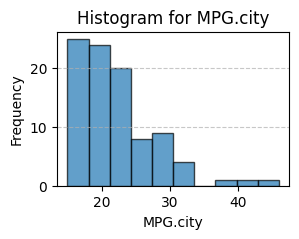

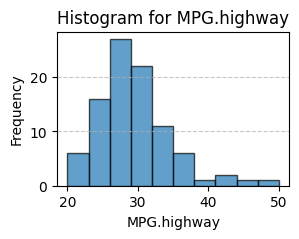

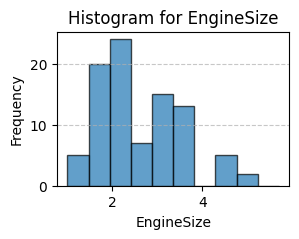

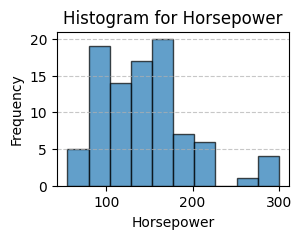

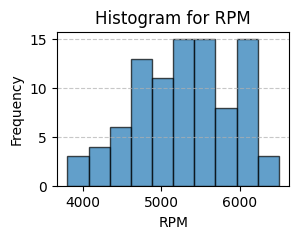

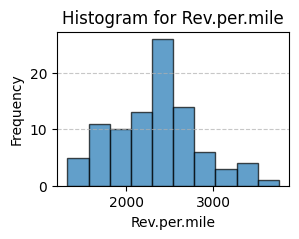

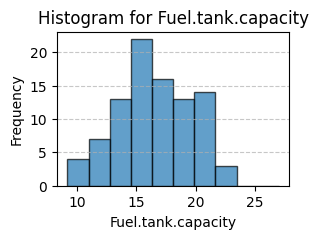

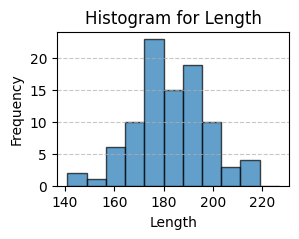

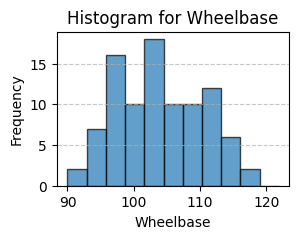

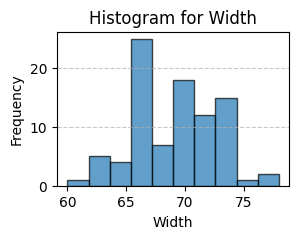

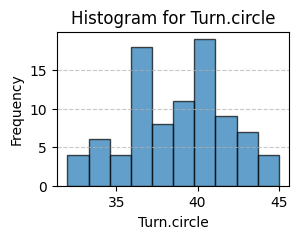

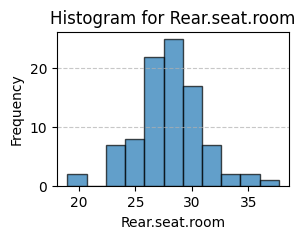

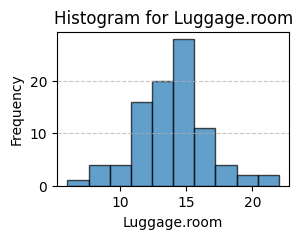

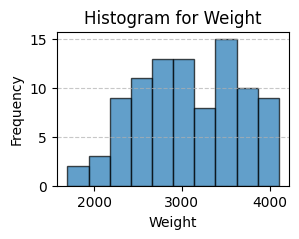

In [18]:
for i in Cars.columns:
    if Cars[i].dtype != 'object':
        total_range = Cars[i].max() - Cars[i].min()
        bin_width = total_range / 10
        bins = np.arange(Cars[i].min(), Cars[i].max() + bin_width, bin_width)

        plt.figure(figsize=(3, 2))
        plt.hist(Cars[i].dropna(), bins=bins, edgecolor='black', alpha=0.7)
        plt.title(f'Histogram for {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

In [19]:
#checking unique values of all the categprical features in Cars

unique_values_list = []

for i in Cars.columns:
    if Cars[i].dtype == 'object':
        unique_values = Cars[i].unique()
        unique_values_list.append({'Column': i, 'Unique Values': unique_values})
    else:
        continue

unique_values_df = pd.DataFrame(unique_values_list)

unique_values_df.head(100)

,Column,Unique Values
0,Manufacturer,"[Acura, Audi, BMW, Buick, Cadillac, Chevrolet,..."
1,Model,"[Integra, Legend, 90, 100, 535i, Century, LeSa..."
2,Type,"[Small, Midsize, Compact, Large, Sporty, Van]"
3,AirBags,"[Driver only, Driver & Passenger]"
4,DriveTrain,"[Front, Rear, 4WD]"
5,Cylinders,"[4, 6, 8, 3, rotary, 5]"
6,Man.trans.avail,"[Yes, No]"
7,Passengers,"[5, 6, 4, 7, 8, 2]"
8,Origin,"[non-USA, USA]"


In [20]:
#there are few noises present in the calegorical columns like Manufacturer have duplicate value 'Chrylser' 'Chrysler' due to spelling mistake and cylinder column have value rotary which is different category of engine
#handling this errors

Cars['Manufacturer'] = Cars['Manufacturer'].replace('Chrylser', 'Chrysler')

#removing row with rotary
Cars = Cars[Cars['Cylinders'] != 'rotary']

In [21]:
#checking again

unique_values_list = []

for i in Cars.columns:
    if Cars[i].dtype == 'object':
        unique_values = Cars[i].unique()
        unique_values_list.append({'Column': i, 'Unique Values': unique_values})
    else:
        continue

unique_values_df = pd.DataFrame(unique_values_list)

unique_values_df.head(100)

,Column,Unique Values
0,Manufacturer,"[Acura, Audi, BMW, Buick, Cadillac, Chevrolet,..."
1,Model,"[Integra, Legend, 90, 100, 535i, Century, LeSa..."
2,Type,"[Small, Midsize, Compact, Large, Sporty, Van]"
3,AirBags,"[Driver only, Driver & Passenger]"
4,DriveTrain,"[Front, Rear, 4WD]"
5,Cylinders,"[4, 6, 8, 3, 5]"
6,Man.trans.avail,"[Yes, No]"
7,Passengers,"[5, 6, 4, 7, 8, 2]"
8,Origin,"[non-USA, USA]"


####4. Write a function to encode all the categorical features in the dataset according to the type of variable jointly.

In [22]:
# listing categorical data

for i in Cars.columns:
  if Cars[i].dtype == 'object':
    number_of_unique_values = Cars[i].value_counts().count()
    print(f'Number of unique values in {i} is {number_of_unique_values}')
  else:
    continue

Number of unique values in Manufacturer is 31
Number of unique values in Model is 92
Number of unique values in Type is 6
Number of unique values in AirBags is 2
Number of unique values in DriveTrain is 3
Number of unique values in Cylinders is 5
Number of unique values in Man.trans.avail is 2
Number of unique values in Passengers is 6
Number of unique values in Origin is 2


In [23]:
l = ['DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin','Passengers']
for i in l:
  u = Cars[i].unique()
  print(u)

['Front' 'Rear' '4WD']
['4' '6' '8' '3' '5']
['Yes' 'No']
['non-USA' 'USA']
[5 6 4 7 8 2]


We already know that Manufacturer, Model, Type are nominal and Airbag is ordinal. As per above values we can conclude that Origin, Man.trans.avail, DriveTrain are nominal, passengers and Cylinders are ordinal except '*rotary*' as it is different category.

In [24]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 92
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        92 non-null     object 
 1   Model               92 non-null     object 
 2   Type                92 non-null     object 
 3   Min.Price           92 non-null     float64
 4   Price               92 non-null     float64
 5   Max.Price           92 non-null     float64
 6   MPG.city            92 non-null     int64  
 7   MPG.highway         92 non-null     int64  
 8   AirBags             92 non-null     object 
 9   DriveTrain          92 non-null     object 
 10  Cylinders           92 non-null     object 
 11  EngineSize          92 non-null     float64
 12  Horsepower          92 non-null     int64  
 13  RPM                 92 non-null     int64  
 14  Rev.per.mile        92 non-null     int64  
 15  Man.trans.avail     92 non-null     object 
 16  Fuel.tank.capac

In [25]:
#classifying ordinal and nominal columns in list

ordinal_col = ['AirBags','Passengers', 'Cylinders']
nominal_col = ['Manufacturer', 'Model', 'Type', 'Origin', 'Man.trans.avail', 'DriveTrain']

Creating function for encoding the categorical features with help pf sklearn

In [26]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

Creating function

In [27]:

def encode_categorical_features(dataset, ordinal_columns, nominal_columns):
    ordinal_encoder = OrdinalEncoder()
    nominal_encoder = OneHotEncoder(sparse_output= False)

    for i in ordinal_columns:
      dataset[i] = ordinal_encoder.fit_transform(dataset[[i]])

    for i in nominal_columns:
      dataset[i] = nominal_encoder.fit_transform(dataset[[i]])

    return dataset

In [28]:
#checking by creating a new dataframe
cars2 = encode_categorical_features(Cars, ordinal_col, nominal_col)
cars2.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,1.0,0.0,0.0,12.9,15.9,18.8,25,31,1.0,0.0,...,13.2,2.0,177,102,68,37,26.5,11.0,2705,0.0
1,1.0,0.0,0.0,29.2,33.9,38.7,18,25,0.0,0.0,...,18.0,2.0,195,115,71,38,30.0,15.0,3560,0.0
2,0.0,0.0,1.0,25.9,29.1,32.3,20,26,1.0,0.0,...,16.9,2.0,180,102,67,37,28.0,14.0,3375,0.0
3,0.0,1.0,0.0,30.8,37.7,44.6,19,26,0.0,0.0,...,21.1,3.0,193,106,70,37,31.0,17.0,3405,0.0
4,0.0,0.0,0.0,23.7,30.0,36.2,22,30,1.0,0.0,...,21.1,1.0,186,109,69,39,27.0,13.0,3640,0.0


In [29]:
#applying function on the main data frame
ordinal_col = ['AirBags','Passengers', 'Cylinders']
nominal_col = ['Manufacturer', 'Model', 'Type', 'Origin', 'Man.trans.avail', 'DriveTrain']
Cars = encode_categorical_features(Cars, ordinal_col, nominal_col)
Cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,0.0,1.0,1.0,12.9,15.9,18.8,25,31,1.0,1.0,...,13.2,2.0,177,102,68,37,26.5,11.0,2705,1.0
1,0.0,1.0,1.0,29.2,33.9,38.7,18,25,0.0,1.0,...,18.0,2.0,195,115,71,38,30.0,15.0,3560,1.0
2,1.0,1.0,0.0,25.9,29.1,32.3,20,26,1.0,1.0,...,16.9,2.0,180,102,67,37,28.0,14.0,3375,1.0
3,1.0,0.0,1.0,30.8,37.7,44.6,19,26,0.0,1.0,...,21.1,3.0,193,106,70,37,31.0,17.0,3405,1.0
4,1.0,1.0,1.0,23.7,30.0,36.2,22,30,1.0,1.0,...,21.1,1.0,186,109,69,39,27.0,13.0,3640,1.0


####5. Write a function to normalize / scale the features either individually or jointly.

In [30]:
#scalling the numerical features
from sklearn.preprocessing import MinMaxScaler

In [31]:
numerical_columns = list(numerical_columns)
numerical_columns

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [32]:
#creating a function for scaling the numerical columns in the dataset

def scale_numerical_features(dataset, numerical_columns):
    scaler = MinMaxScaler()
    dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])
    return dataset

In [33]:
#testing the function
cars3 = scale_numerical_features(Cars, numerical_columns)
cars3.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,0.0,1.0,1.0,0.160207,0.155963,0.151179,0.322581,0.366667,1.0,1.0,...,0.224719,2.0,0.461538,0.413793,0.444444,0.384615,0.441176,0.3125,0.419087,1.0
1,0.0,1.0,1.0,0.581395,0.486239,0.427184,0.096774,0.166667,0.0,1.0,...,0.494382,2.0,0.692308,0.862069,0.611111,0.461538,0.647059,0.5625,0.773859,1.0
2,1.0,1.0,0.0,0.496124,0.398165,0.338419,0.161290,0.200000,1.0,1.0,...,0.432584,2.0,0.500000,0.413793,0.388889,0.384615,0.529412,0.5000,0.697095,1.0
3,1.0,0.0,1.0,0.622739,0.555963,0.509015,0.129032,0.200000,0.0,1.0,...,0.668539,3.0,0.666667,0.551724,0.555556,0.384615,0.705882,0.6875,0.709544,1.0
4,1.0,1.0,1.0,0.439276,0.414679,0.392510,0.225806,0.333333,1.0,1.0,...,0.668539,1.0,0.576923,0.655172,0.500000,0.538462,0.470588,0.4375,0.807054,1.0


In [34]:
#applying on main dataframe

Cars = scale_numerical_features(Cars, numerical_columns)
Cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,0.0,1.0,1.0,0.160207,0.155963,0.151179,0.322581,0.366667,1.0,1.0,...,0.224719,2.0,0.461538,0.413793,0.444444,0.384615,0.441176,0.3125,0.419087,1.0
1,0.0,1.0,1.0,0.581395,0.486239,0.427184,0.096774,0.166667,0.0,1.0,...,0.494382,2.0,0.692308,0.862069,0.611111,0.461538,0.647059,0.5625,0.773859,1.0
2,1.0,1.0,0.0,0.496124,0.398165,0.338419,0.161290,0.200000,1.0,1.0,...,0.432584,2.0,0.500000,0.413793,0.388889,0.384615,0.529412,0.5000,0.697095,1.0
3,1.0,0.0,1.0,0.622739,0.555963,0.509015,0.129032,0.200000,0.0,1.0,...,0.668539,3.0,0.666667,0.551724,0.555556,0.384615,0.705882,0.6875,0.709544,1.0
4,1.0,1.0,1.0,0.439276,0.414679,0.392510,0.225806,0.333333,1.0,1.0,...,0.668539,1.0,0.576923,0.655172,0.500000,0.538462,0.470588,0.4375,0.807054,1.0


####6. Write a function to create a random split of the data into train, validation and test sets in the ratio of [70:20:10].

In [35]:
#creating the function for spliting the dataset in 3 parts
from sklearn.model_selection import train_test_split

In [36]:
def split_dataset(dataset):
    tr_ratio = 0.7
    val_ratio = 0.2

    train_size = int(len(dataset) * tr_ratio)
    validation_size = int(len(dataset) * val_ratio)

    dataset = dataset.sample(frac=1, random_state=42)

    train_set = dataset[:train_size]
    validation_set = dataset[train_size:train_size + validation_size]
    test_set = dataset[train_size + validation_size:]

    return train_set, validation_set, test_set

In [37]:
#testing the function
train_set, validation_set, test_set = split_dataset(Cars)
train_set.shape, validation_set.shape, test_set.shape

((64, 26), (18, 26), (10, 26))

In [38]:
#creating another function with help of sklearn

def split_dataset_sklearn(dataset):
    train_set, test_set = train_test_split(dataset, test_size=0.3, random_state=42)
    validation_set, test_set = train_test_split(test_set, test_size=0.33, random_state=42)
    return train_set, validation_set, test_set

In [39]:
#testing the function
train_set, validation_set, test_set = split_dataset_sklearn(Cars)
train_set.shape, validation_set.shape, test_set.shape

((64, 26), (18, 26), (10, 26))

# Question 2

###Q2a: Linear Regression Task.

Use the “linear_regression_dataset.csv”
Implement the linear regression model to predict the dependency between two variables.
1. Implement linear regression using the inbuilt function “LinearRegression” model in
sklearn.
2. Print the coefficient obtained from linear regression and plot a straight line on the scatter
plot.
3. Now, implement linear regression without the use of any inbuilt function.
4. Compare the results of 1 and 3 graphically.

In [40]:
Linear_reg = pd.read_csv('/content/drive/MyDrive/Assignment files/Ass1 ML/linear_regression_dataset.csv')
Linear_reg.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [41]:
Linear_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Height   15 non-null     float64
 1   Weight   15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


In [42]:
Linear_reg.columns

Index(['Height ', 'Weight'], dtype='object')

Column Height name have a extra space at the end, we should trim it  

In [43]:
Linear_reg.columns = Linear_reg.columns.str.strip()

In [44]:
Linear_reg.columns

Index(['Height', 'Weight'], dtype='object')

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
x = Linear_reg[['Height']]
y = Linear_reg['Weight']

In [47]:
#creating the linear regression model

model = LinearRegression()

model.fit(x, y)

y2 = model.predict(x)


In [48]:
#coeficient obtained
print(model.coef_)

[61.27218654]


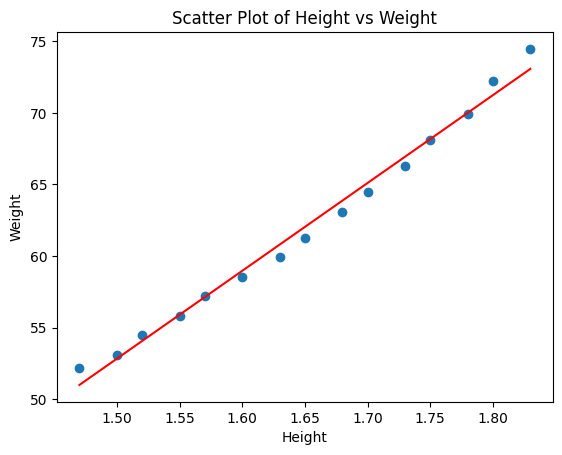

In [49]:
#ploting a scatter plot comparing y2 and y

plt.scatter(x, y)
plt.plot(x, y2, color='red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height vs Weight')
plt.show()

In [50]:
#creating linear regressor without using sklearn and using ordinary least square method

def linear_regressor(x, y):
    x_mean = np.mean(x['Height'])
    y_mean = np.mean(y)

    numerator = 0
    denominator = 0
    for i in range(len(x)):
        numerator += (x['Height'][i] - x_mean) * (y[i] - y_mean)
        denominator += (x['Height'][i] - x_mean) ** 2

    slope = numerator / denominator
    intercept = y_mean - (slope * x_mean)
    return slope, intercept

def predict(x, slope, intercept):
    return slope * x + intercept

In [51]:
slope, intercept = linear_regressor(x, y)

y_pred = []
for i in x['Height']:
    p = predict(i, slope, intercept)
    y_pred.append(p)

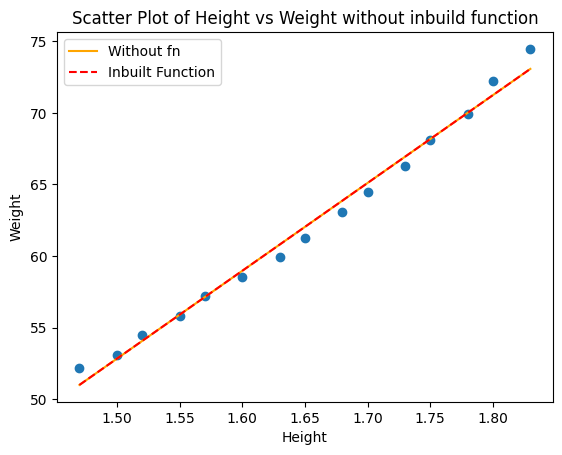

In [52]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='orange', linestyle='-', label = 'Without fn')
plt.plot(x, y2, color='red',linestyle='--', label='Inbuilt Function')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height vs Weight without inbuild function')
plt.legend()
plt.show()

###Q2b: Logistic Regression Task.

Use the “logistic_regression_dataset.csv”
1. Split the dataset into training set and test set in the ratio of 70:30 or 80:20
2. Train the logistic regression classifier (using inbuilt function: LogisticRegression from
sklearn).
3. Print the confusion matrix and accuracy.

#####Preprocessing

In [97]:
Logistic_reg = pd.read_csv('/content/drive/MyDrive/Assignment files/Ass1 ML/logistic_regression_dataset.csv')
Logistic_reg.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [98]:
encoder = OneHotEncoder(sparse_output= False)

Logistic_reg['Gender'] = encoder.fit_transform(Logistic_reg[['Gender']])

Scaler = MinMaxScaler()
Logistic_reg['EstimatedSalary'] = Scaler.fit_transform(Logistic_reg[['EstimatedSalary']])

Logistic_reg.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0.0,19,0.029630,0
1,15810944,0.0,35,0.037037,0
2,15668575,1.0,26,0.207407,0
3,15603246,1.0,27,0.311111,0
4,15804002,0.0,19,0.451852,0


#####Data for Model Training

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

User Id column have no significance in customer behaviour hence droping it

In [99]:
log_y = Logistic_reg['Purchased']
log_x = Logistic_reg.drop(['Purchased', 'User ID'], axis= 1)

#####Trying 70:30 split

accuracy - 86.67 %

In [105]:
#using traintestsplit for creating training and testing data

train_x, test_x, train_y, test_y = train_test_split(log_x, log_y, test_size=0.3, random_state=42)

In [101]:
model = LogisticRegression()
model.fit(train_x, train_y)

log_y_pred = model.predict(test_x)

accuracy_score(test_y, log_y_pred)

0.8666666666666667

In [102]:
confusion_matrix(test_y, log_y_pred)

array([[71,  2],
       [14, 33]])

#####Trying 80:20 split

accuracy - 91.25 %

In [106]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(log_x, log_y, test_size=0.2, random_state=42)

In [107]:
model2 = LogisticRegression()
model2.fit(train_x2, train_y2)

log_y_pred2 = model2.predict(test_x2)

accuracy_score(test_y2, log_y_pred2)


0.9125

In [109]:
confusion_matrix(test_y2, log_y_pred2)

array([[50,  2],
       [ 5, 23]])